# Task 3

# Introduction  
To build a Decision Tree model to predict whether a customer will subscribe to a term deposit based on their demographic and behavioral data from the Bank Marketing dataset.

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the dataset

In [2]:
df = pd.read_csv("bank-additional.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
df.shape


(4119, 21)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [7]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.duplicated().sum()

0

In [12]:
df_obj= df.select_dtypes(include='object').columns

df_num= df.select_dtypes(exclude='object').columns

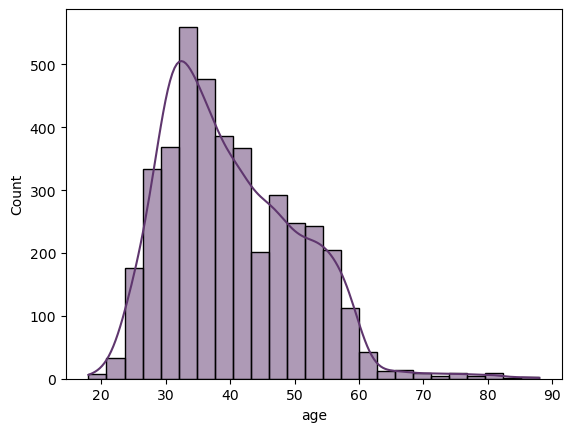

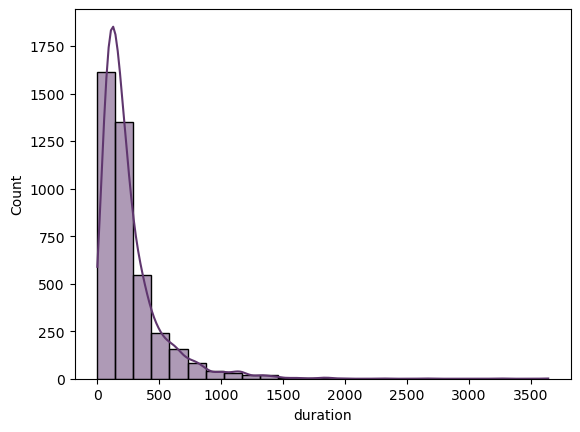

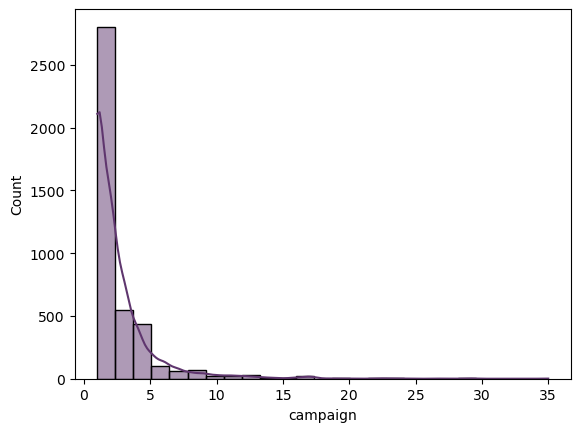

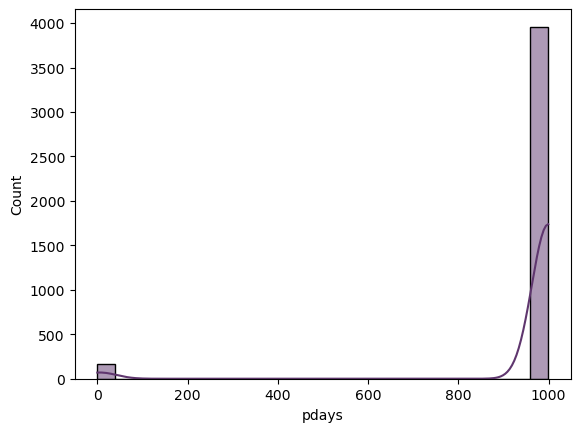

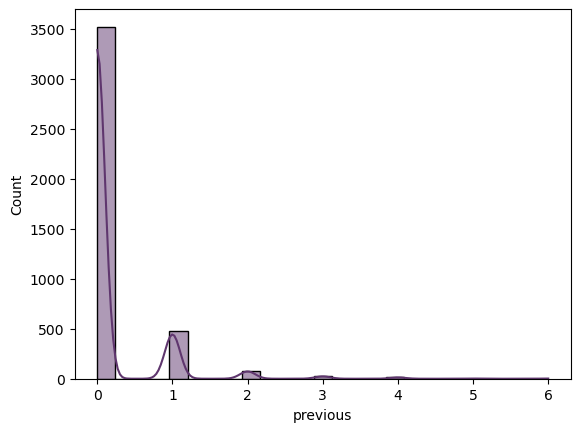

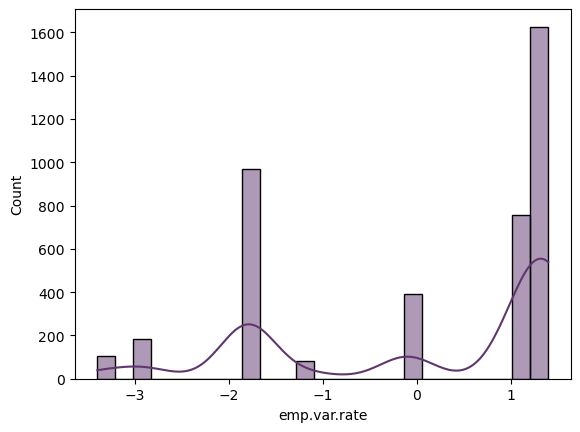

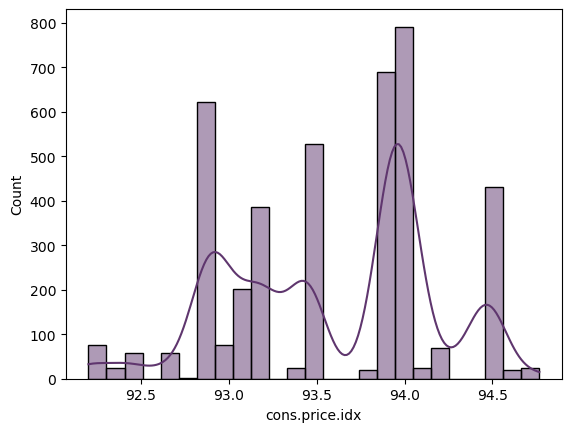

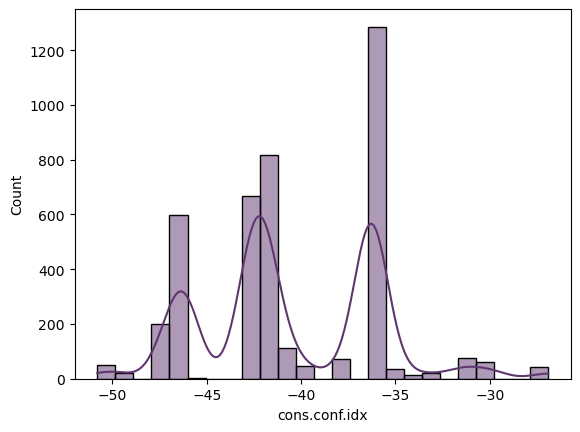

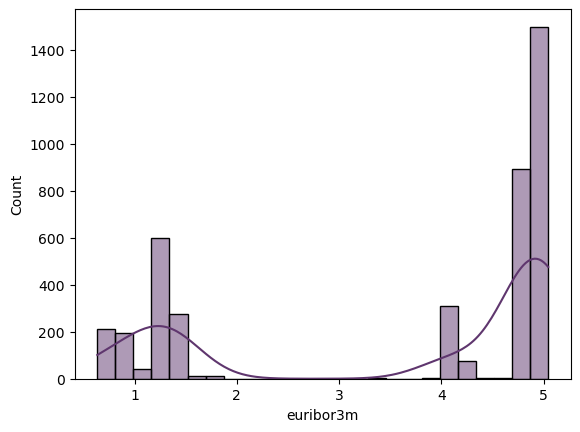

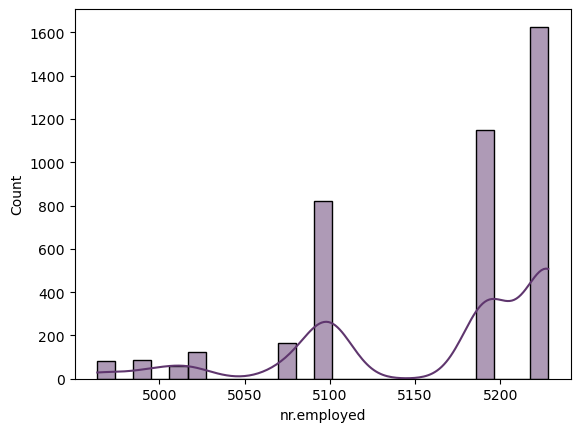

In [13]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='#5f366e')
    plt.show()

# Visualizing categorical columns using bar graphs

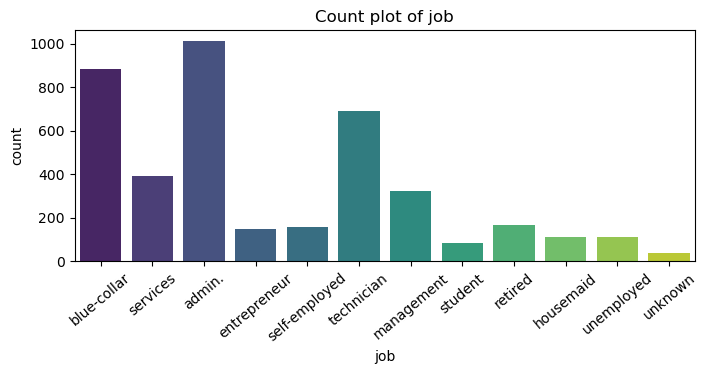

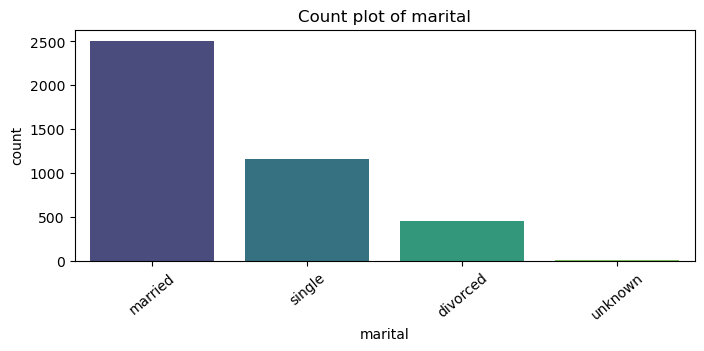

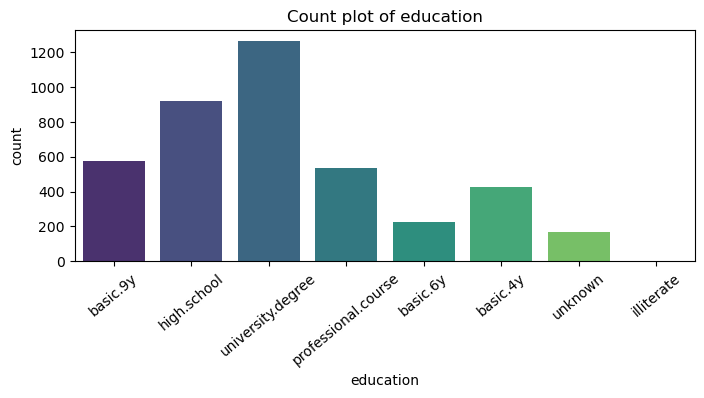

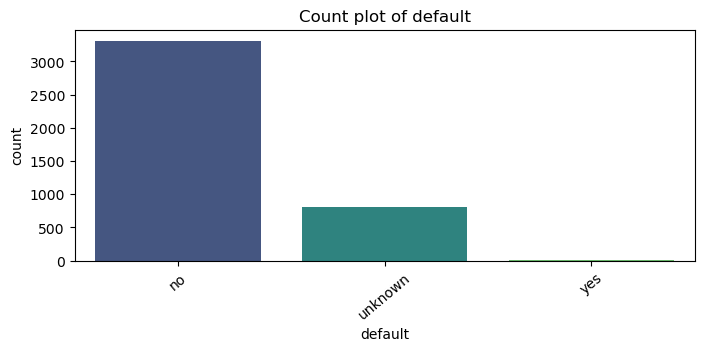

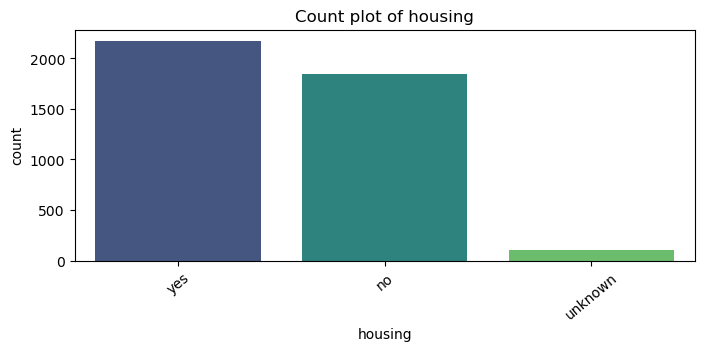

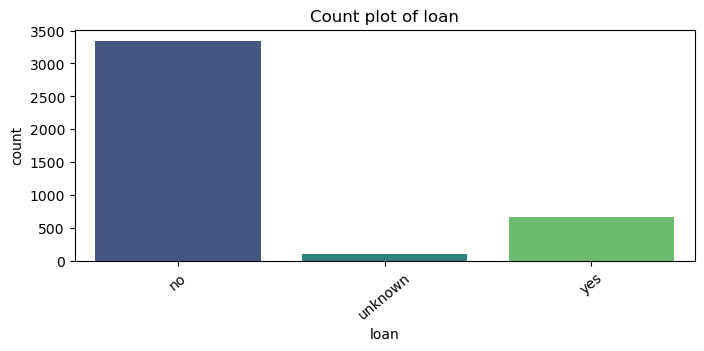

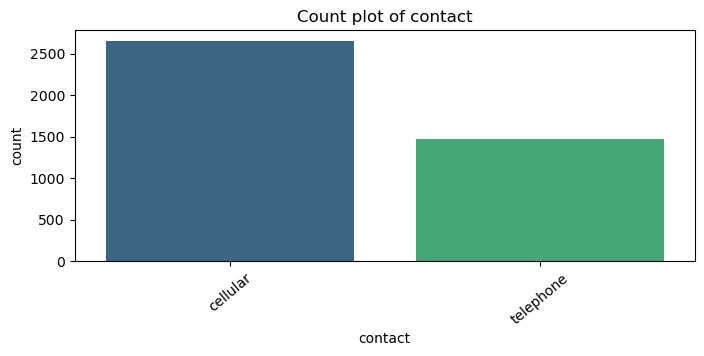

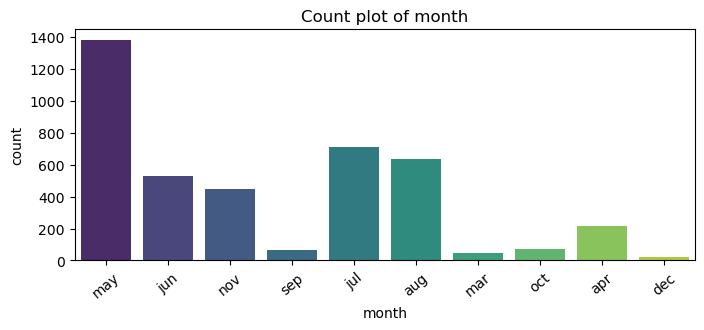

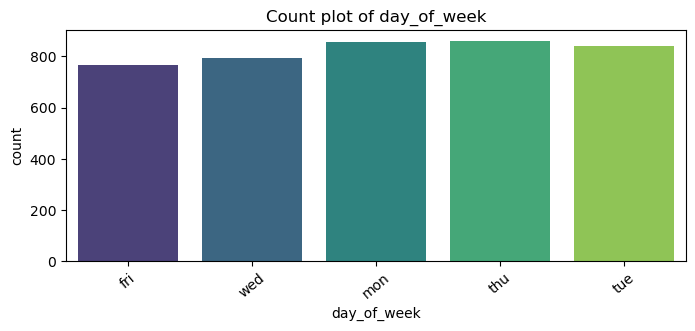

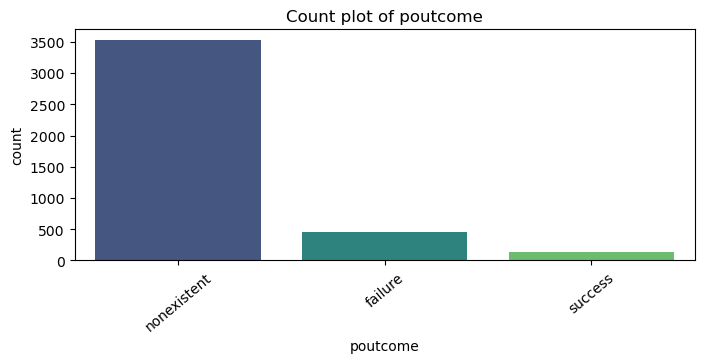

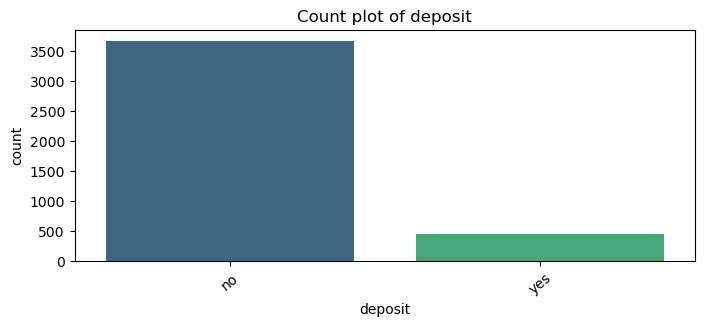

In [14]:
for feature in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

# checking for outliers

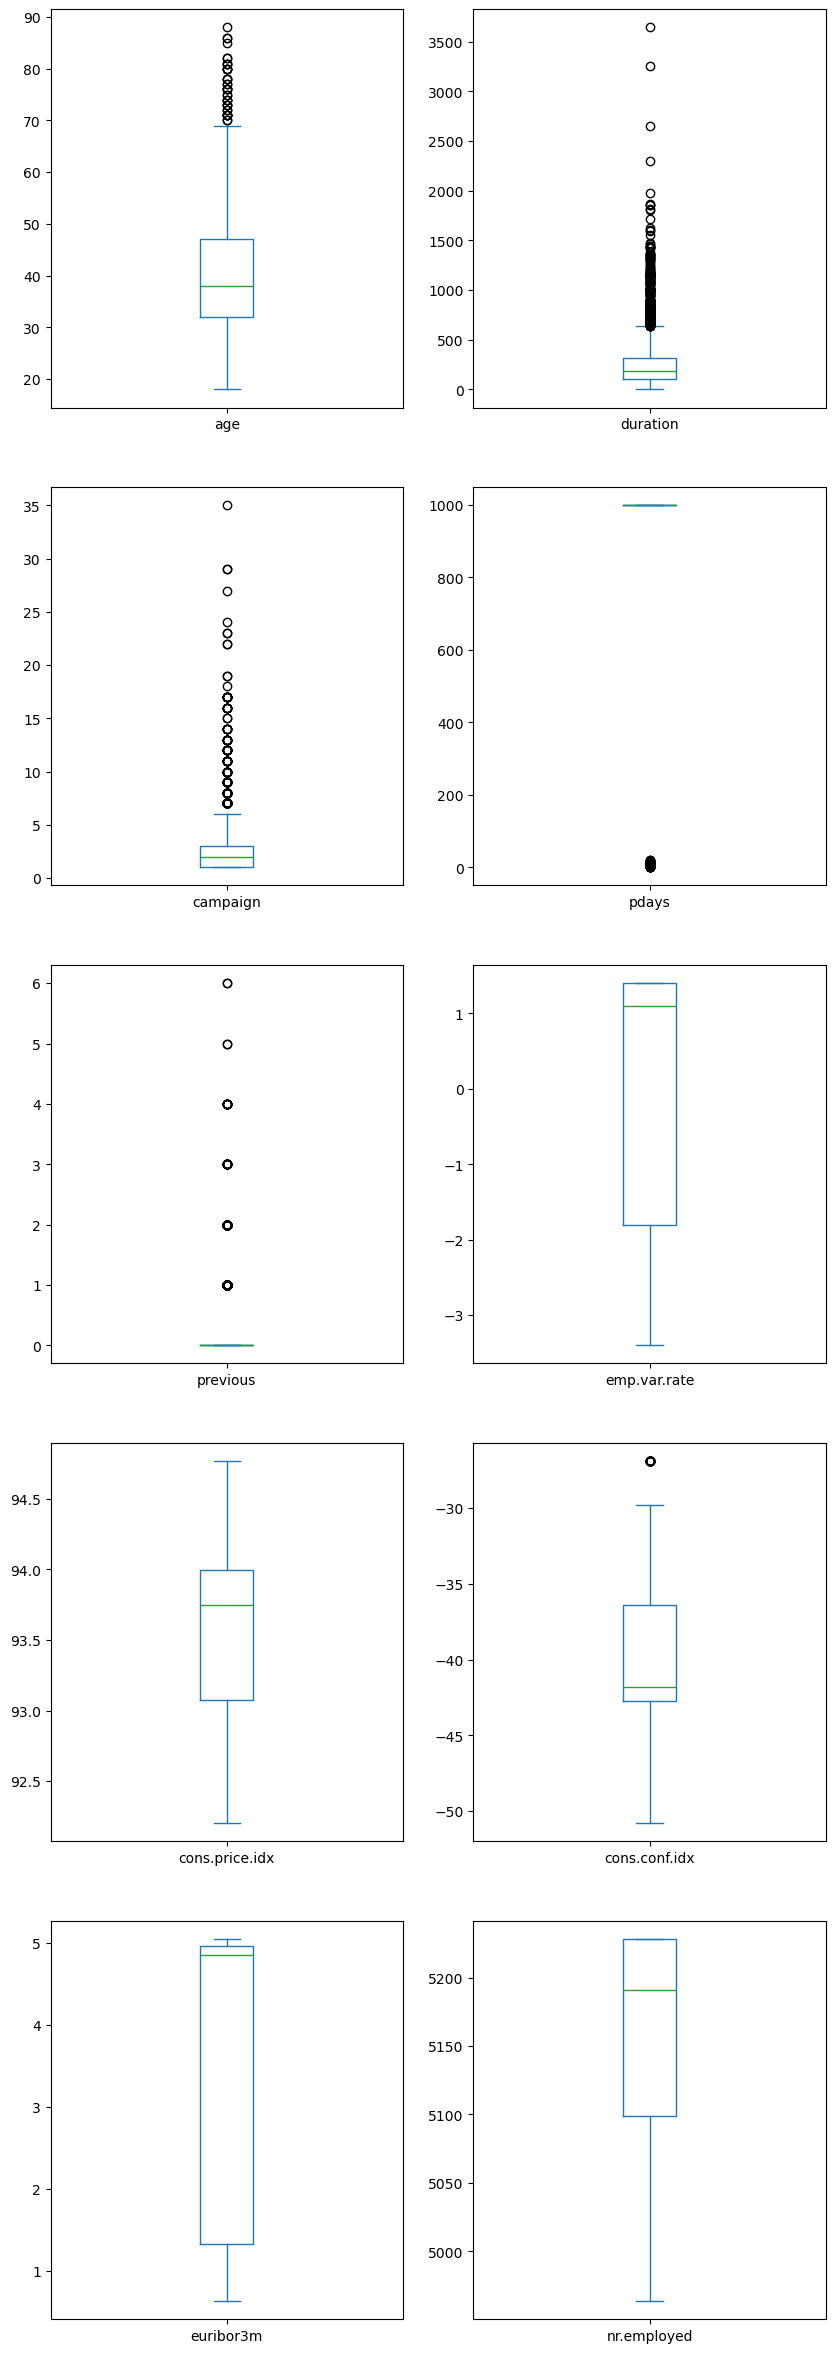

In [15]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

# Outlier treatment

In [16]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

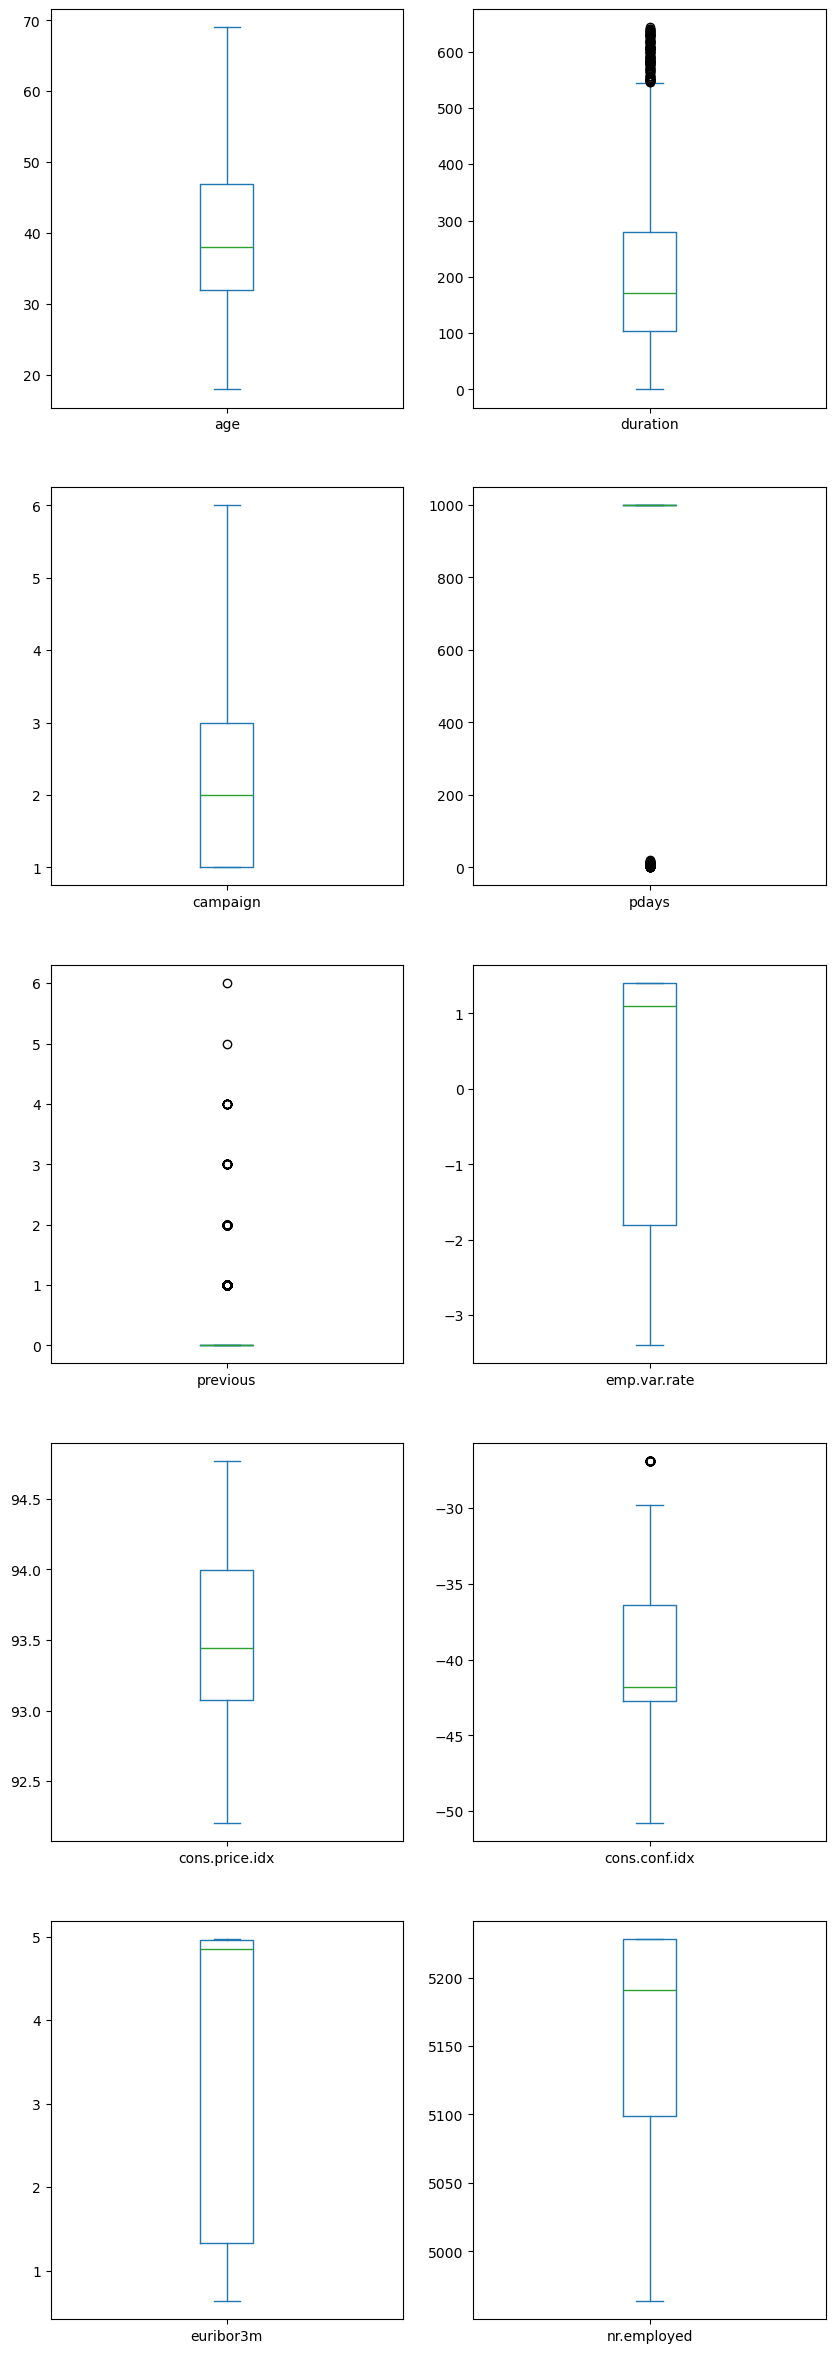

In [17]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

# Checking for correlation using heatmap

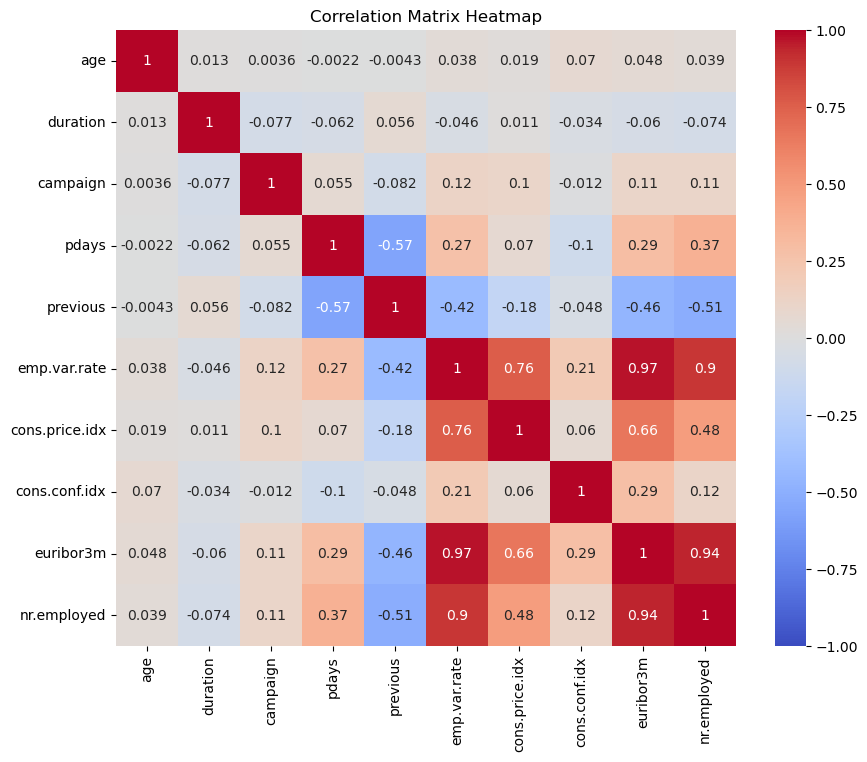

In [18]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [20]:
# copy the original dataframe

df1=df.copy()

# Removing high correlated columns from the dataset
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

# showing dimensions of the updated dataset

In [21]:
df1.shape

(3573, 18)

# Conversion of categorical columns into numerical columns using label encoder.

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,18,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,18,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,18,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,18,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,18,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,18,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,18,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,18,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,509,0,18,0,1,13,17,0


# Checking the target variable

In [25]:
## independent variables
x = df_encoded.iloc[:,:-1]   

## Target variable
y = df_encoded.iloc[:,-1]  

In [26]:
x.shape

(3573, 17)

In [27]:
y.shape

(3573,)

# Splitting the dataset into train and test datasets

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2501, 17)
(1072, 17)
(2501,)
(1072,)


# Decision Tree classifier
using 'gini' criterion

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Evaluating Training and Testing Accuracy

In [32]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9488204718112755
Testing accuracy: 0.9225746268656716


In [33]:
y_pred=dc.predict(x_test)

# Evaluating Prediction Accuracy

In [34]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9225746268656716


In [35]:
print(confusion_matrix(y_test,y_pred))

[[965  18]
 [ 65  24]]


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       983
           1       0.57      0.27      0.37        89

    accuracy                           0.92      1072
   macro avg       0.75      0.63      0.66      1072
weighted avg       0.91      0.92      0.91      1072



# Plot Decision Tree

In [37]:
from sklearn.tree import plot_tree

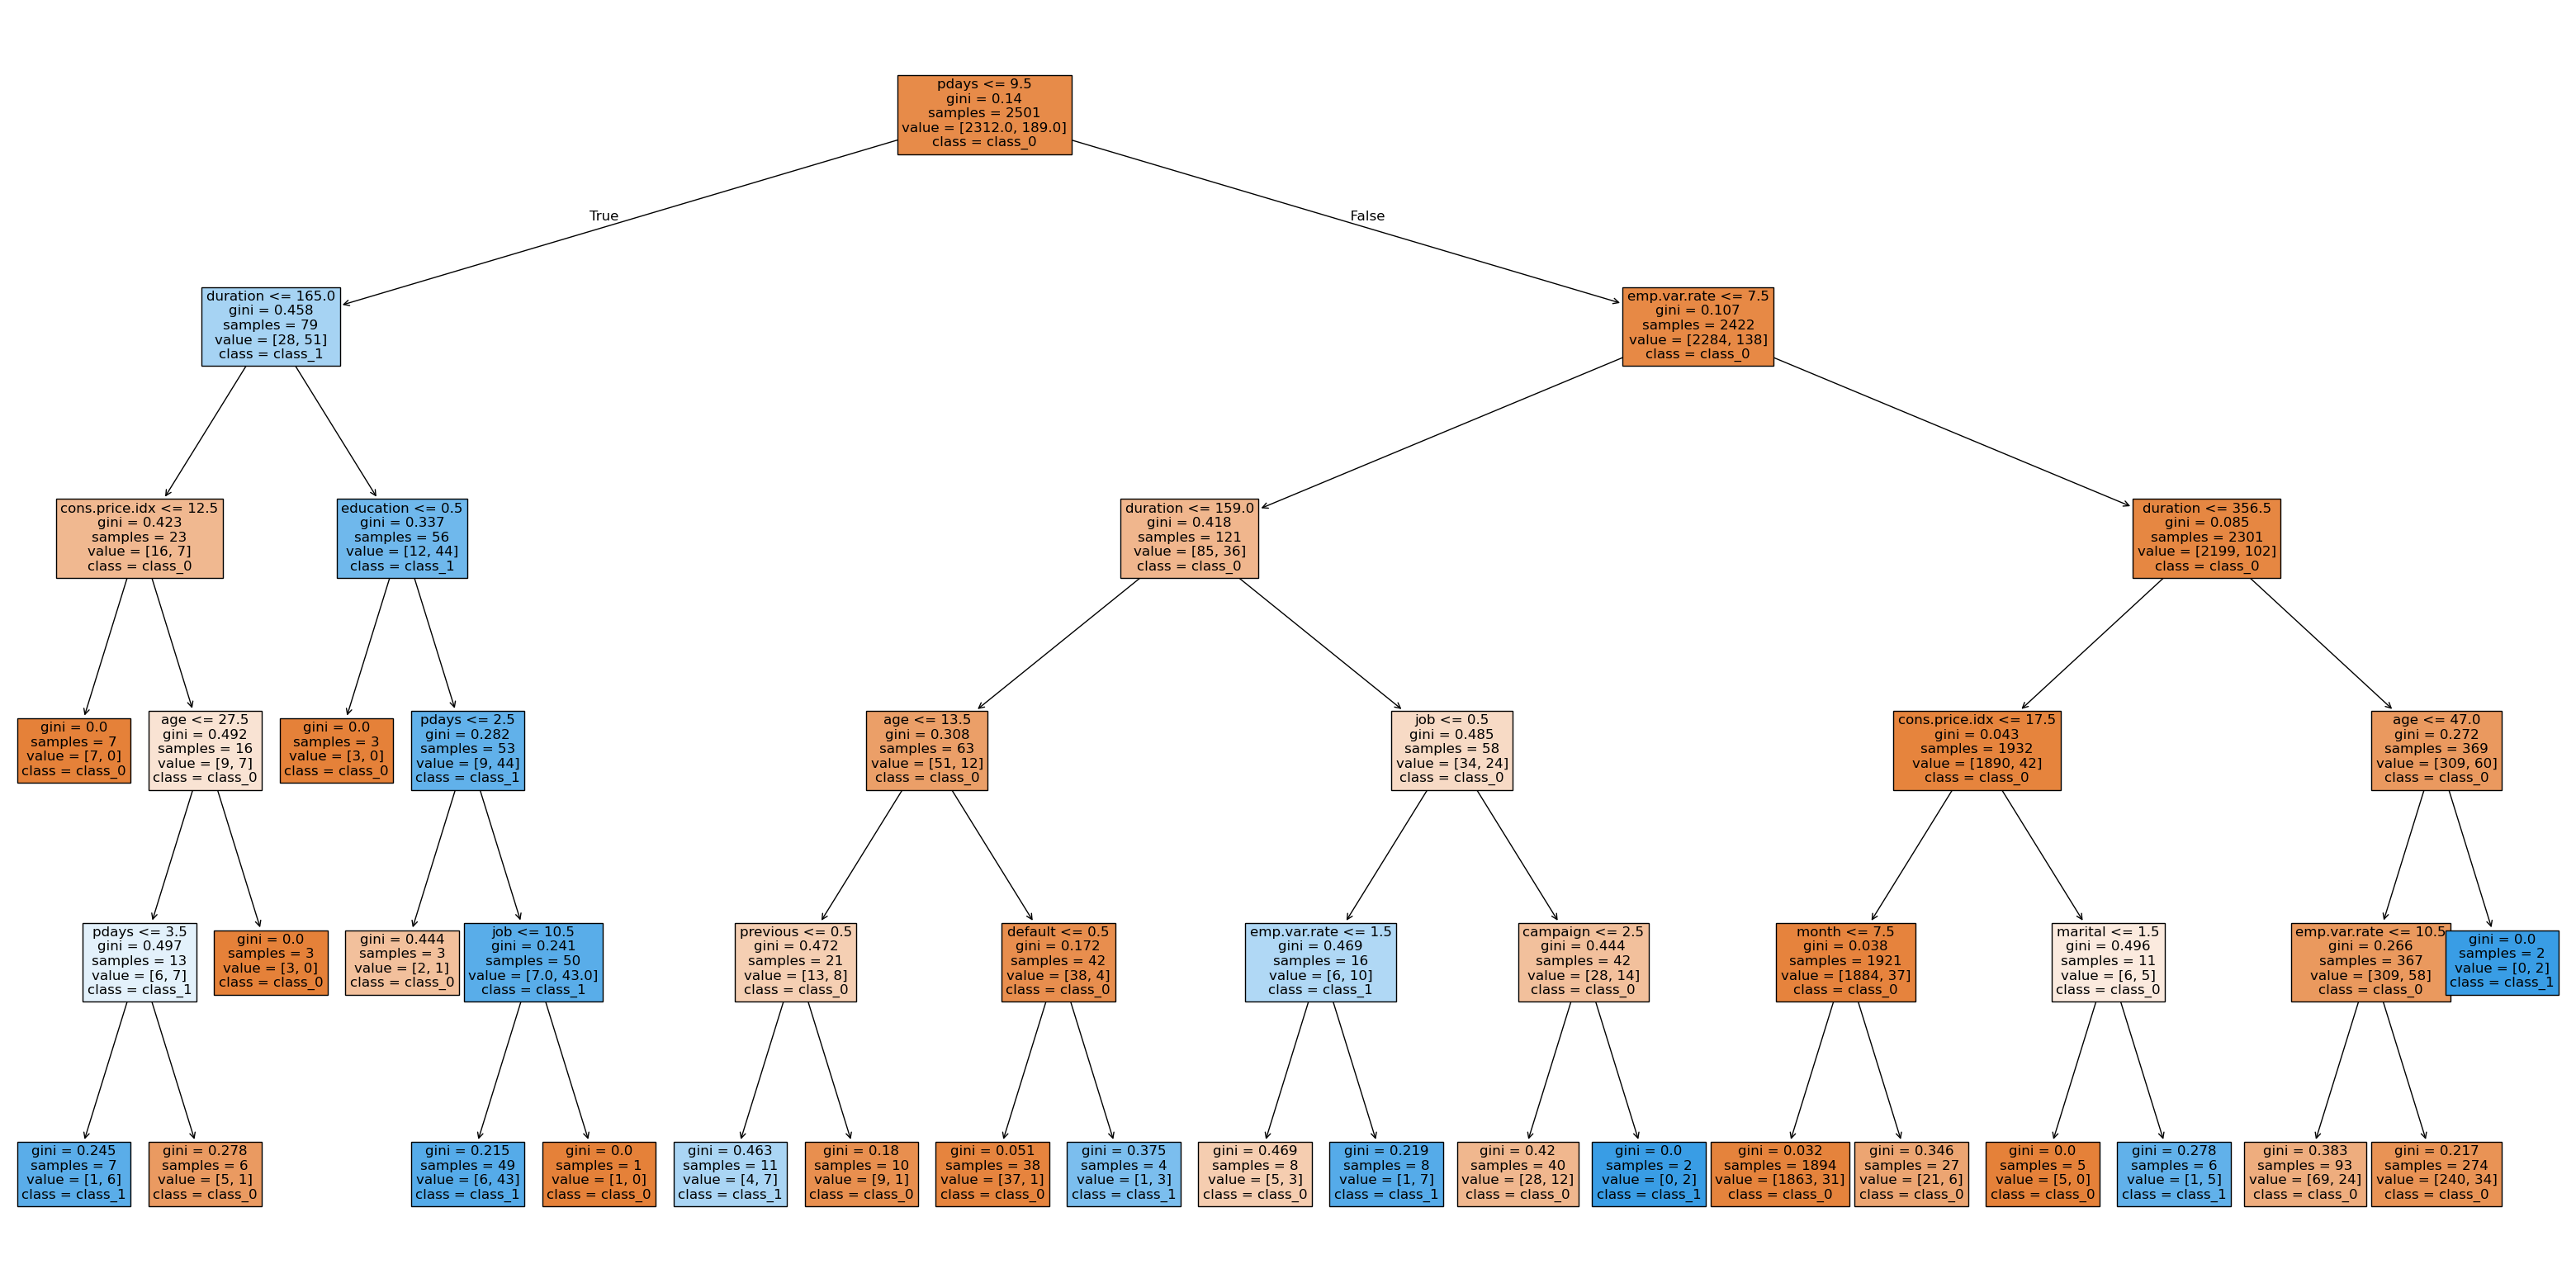

In [38]:
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

# Decision Tree classifier
using 'entropy' criterion

In [39]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

# Evaluating Training and Testing Accuracy

In [40]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9472211115553778
Testing accuracy: 0.9281716417910447


In [41]:
y1_pred=dc1.predict(x_test)

# Evaluating Prediction Accuracy

In [42]:
print(accuracy_score(y_test,y1_pred))

0.9281716417910447


In [43]:
print(confusion_matrix(y_test,y1_pred))

[[971  12]
 [ 65  24]]


In [44]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       983
           1       0.67      0.27      0.38        89

    accuracy                           0.93      1072
   macro avg       0.80      0.63      0.67      1072
weighted avg       0.91      0.93      0.91      1072



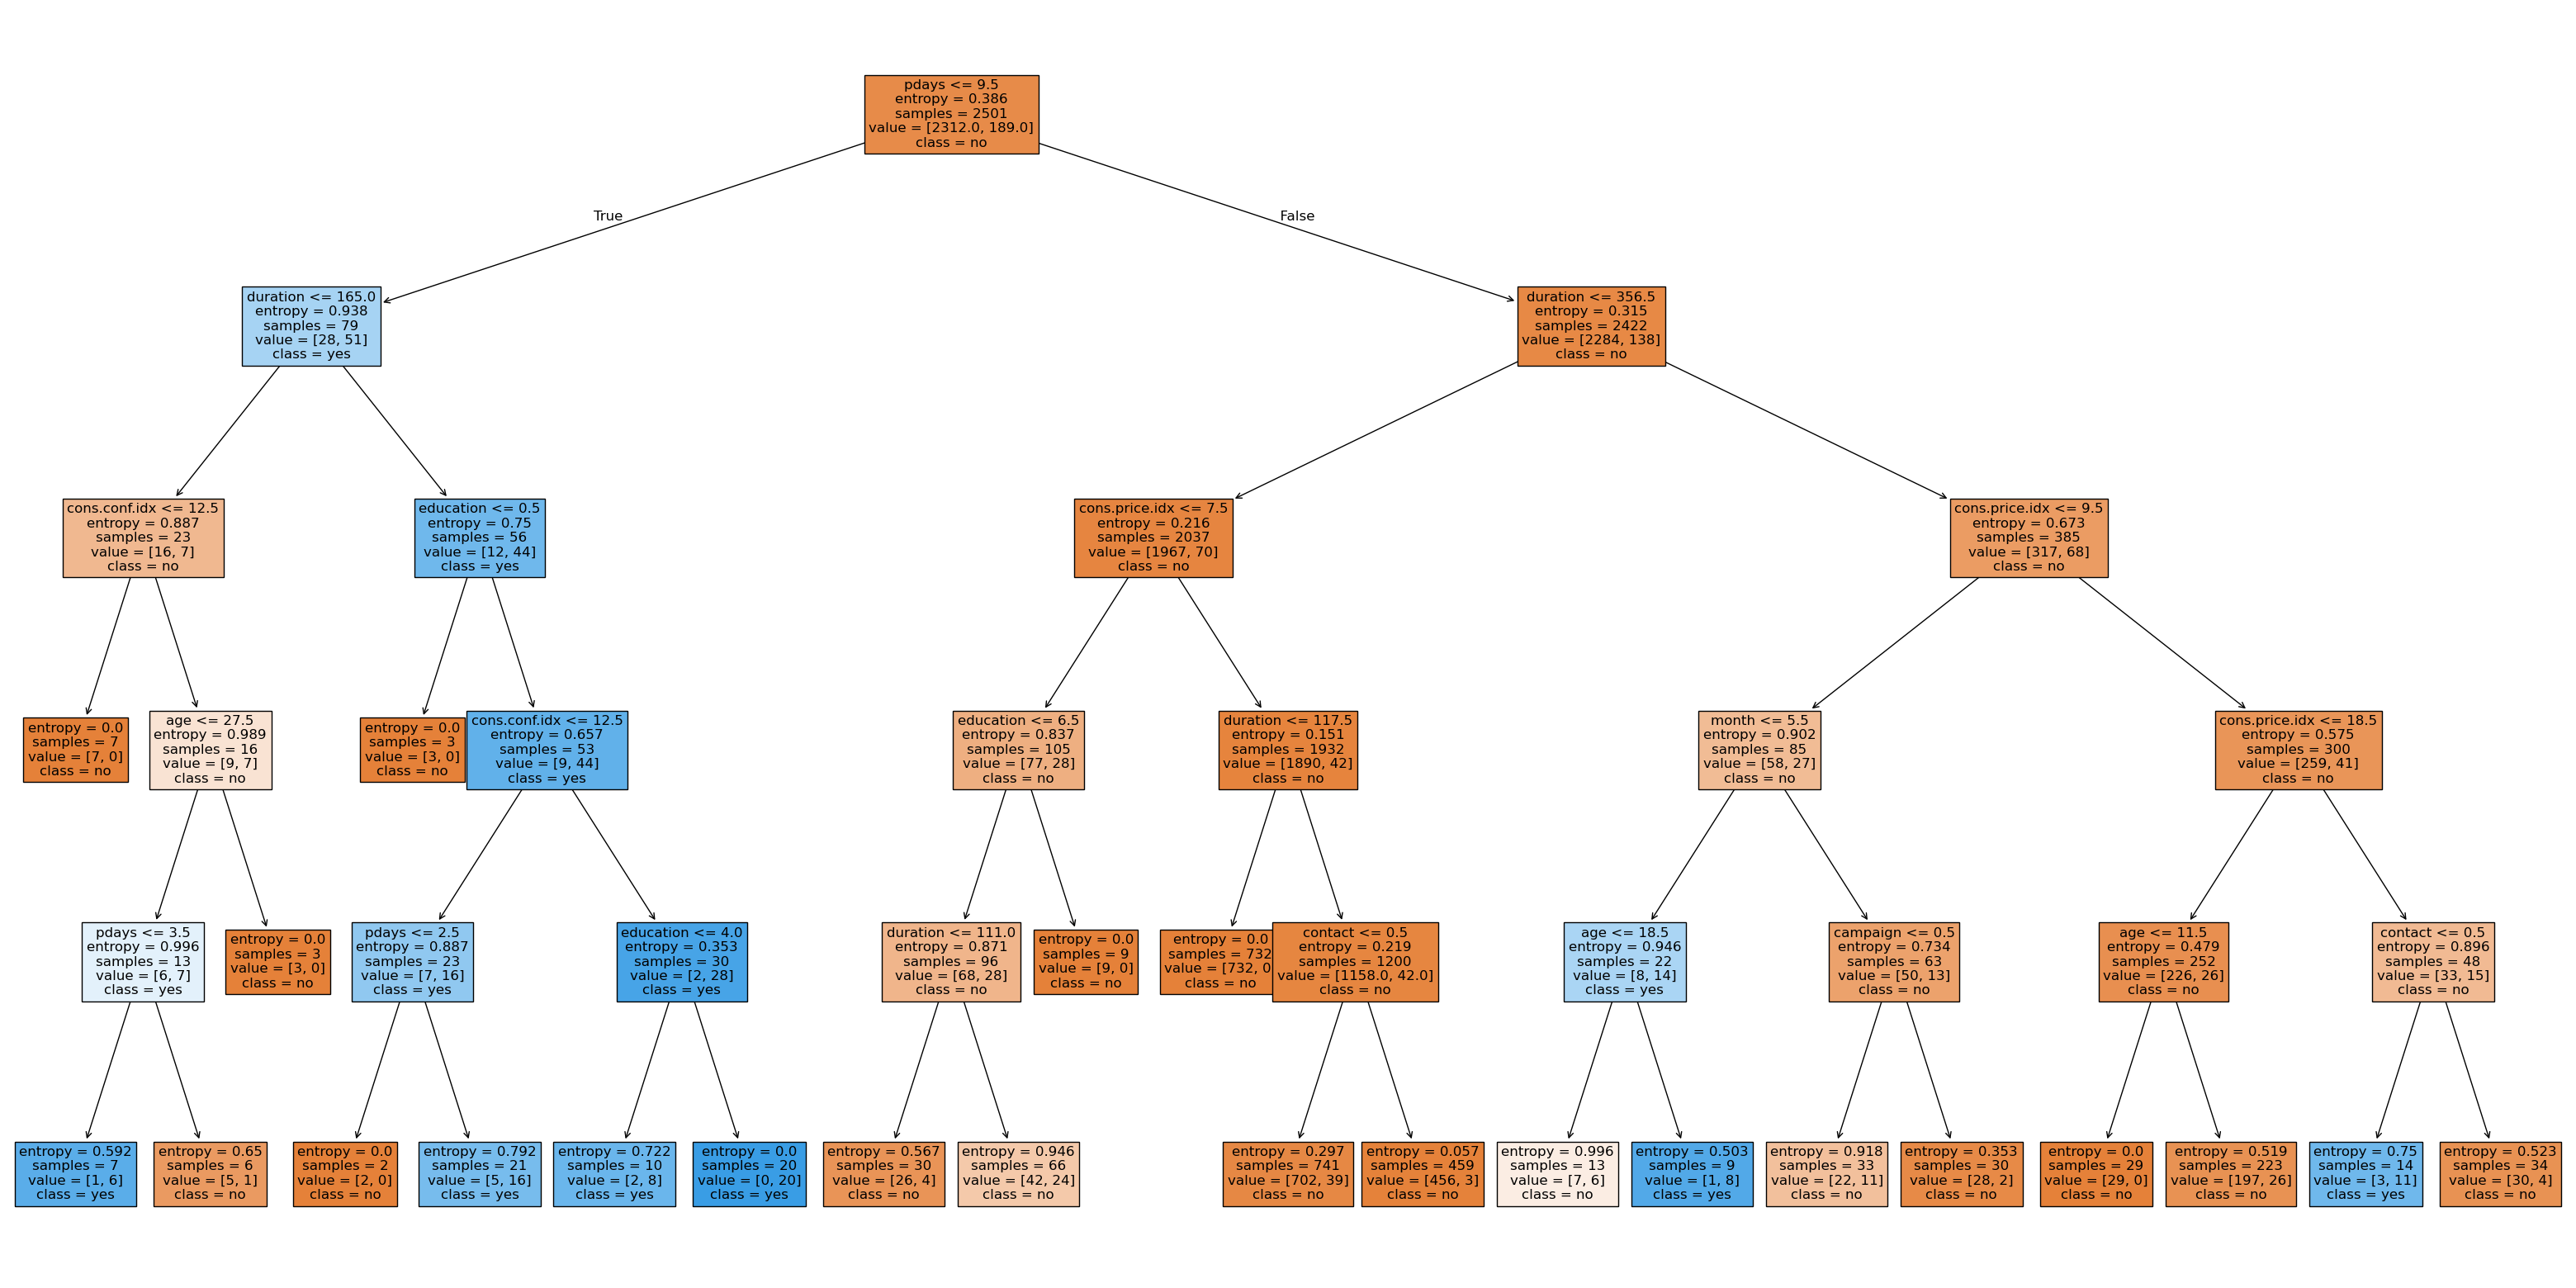

In [45]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()